** About Dataset**:

This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

**COLUMNS**:

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres(central business district)

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the  data
prices=pd.read_csv("/content/MELBOURNE_HOUSE_PRICES_LESS.csv")
house=pd.read_csv("/content/Melbourne_housing_FULL.csv")

In [3]:
prices.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


EXPLORATORY DATA ANALYSIS

In [5]:
prices.shape

(63023, 13)

In [6]:
prices.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [7]:
prices.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [9]:
prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [10]:
house.shape

(34857, 21)

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
house.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [13]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [14]:
# converting dtype of Date from object to Datetime
prices['Date'] = pd.to_datetime(prices['Date'])
house['Date'] = pd.to_datetime(house['Date'])

In [15]:
# Checking and removing any duplicates from the data
prices[prices.duplicated()]
prices.drop_duplicates(inplace=True)
prices

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [16]:
# Checking and removing any duplicates from the data
house[house.duplicated()]
house.drop_duplicates(inplace=True)
house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
prices[['Price']] = imputer.fit_transform(prices[['Price']])
prices.isnull().sum().sum()

0

In [18]:
house.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [19]:
#dropping columns
house = house.drop(columns=['BuildingArea', 'YearBuilt'])

In [20]:
imputercat = SimpleImputer(strategy='most_frequent')
house[['CouncilArea', 'Regionname']] = imputercat.fit_transform(house[['CouncilArea', 'Regionname']] )

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
house[['Price','Bathroom','Car','Lattitude','Bedroom2','Postcode','Propertycount','Distance','Longtitude','Landsize']] = imputer.fit_transform(house[['Price','Bathroom','Car','Lattitude','Bedroom2','Postcode','Propertycount','Distance','Longtitude','Landsize']])

In [22]:
house.isnull().sum().sum()

0

In [23]:
data = pd.merge(prices,house,how = 'inner',on=['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG','Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance','CouncilArea'])

In [24]:
data.shape

(16454, 19)

In [25]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
dtype: int64

In [26]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,2017-01-07,3067,Northern Metropolitan,4019,3.0,Yarra City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [27]:
data.nunique()

Suburb             344
Address          16266
Rooms               11
Type                 3
Price             2352
Method               5
SellerG            290
Date                75
Postcode           209
Regionname           8
Propertycount      336
Distance           168
CouncilArea         33
Bedroom2            12
Bathroom             9
Car                 13
Landsize          1335
Lattitude        10210
Longtitude       10623
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16454 entries, 0 to 16453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         16454 non-null  object        
 1   Address        16454 non-null  object        
 2   Rooms          16454 non-null  int64         
 3   Type           16454 non-null  object        
 4   Price          16454 non-null  float64       
 5   Method         16454 non-null  object        
 6   SellerG        16454 non-null  object        
 7   Date           16454 non-null  datetime64[ns]
 8   Postcode       16454 non-null  int64         
 9   Regionname     16454 non-null  object        
 10  Propertycount  16454 non-null  int64         
 11  Distance       16454 non-null  float64       
 12  CouncilArea    16454 non-null  object        
 13  Bedroom2       16454 non-null  float64       
 14  Bathroom       16454 non-null  float64       
 15  Car            1645

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,16454.0,3.082776e+00,0.937520,1.00000,3.000000,3.0000,4.000000e+00,1.600000e+01
Price,16454.0,1.033030e+06,629175.162504,112000.00000,635000.000000,855000.0000,1.255000e+06,1.120000e+07
Postcode,16454.0,3.126023e+03,133.015818,3000.00000,3051.000000,3101.0000,3.163000e+03,3.978000e+03
Propertycount,16454.0,7.659402e+03,4459.253551,83.00000,4385.000000,6795.0000,1.052900e+04,2.165000e+04
Distance,16454.0,1.289917e+01,7.819730,0.00000,6.800000,11.7000,1.720000e+01,4.810000e+01
Bedroom2,16454.0,3.160447e+00,0.793458,0.00000,3.000000,3.0000,4.000000e+00,1.600000e+01
Bathroom,16454.0,1.743224e+00,0.622230,0.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,16454.0,1.889510e+00,0.869576,0.00000,1.000000,2.0000,2.000000e+00,1.800000e+01
Landsize,16454.0,6.273521e+02,3818.931798,0.00000,521.000000,521.0000,6.010000e+02,4.330140e+05
Lattitude,16454.0,-3.780593e+01,0.093425,-38.19043,-37.846888,-37.8076,-3.775946e+01,-3.739780e+01


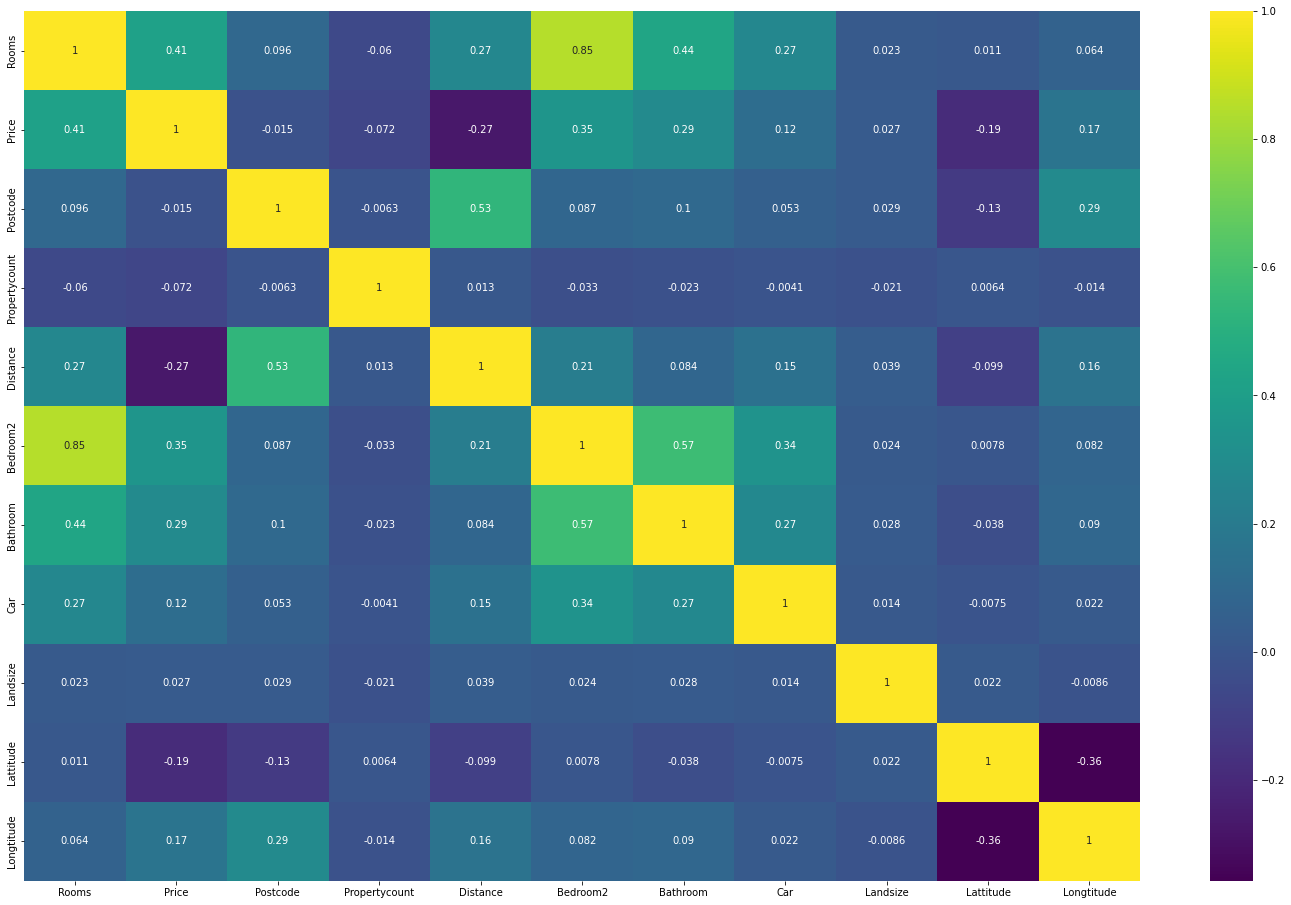

In [30]:
plt.figure(figsize=(25,16))
ax = sns.heatmap(data.corr(),annot = True, cmap = 'viridis')
plt.show()

In [31]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.week

In [32]:
data["Type"].value_counts()

h    11705
u     3107
t     1642
Name: Type, dtype: int64

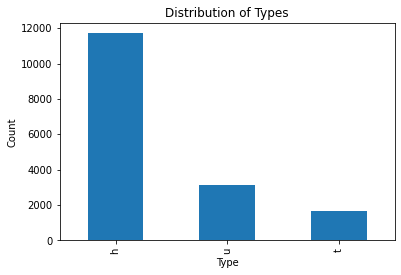

In [33]:
#Visualizing the Type Data
data["Type"].value_counts().plot(kind="bar")
plt.title("Distribution of Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

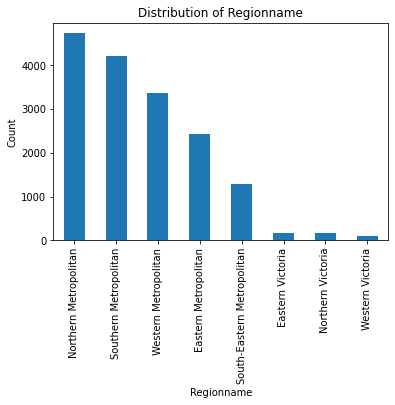

In [34]:
#Visualizing the Regionname Data
data["Regionname"].value_counts().plot(kind="bar")
plt.title("Distribution of Regionname")
plt.xlabel("Regionname")
plt.ylabel("Count")
plt.show()

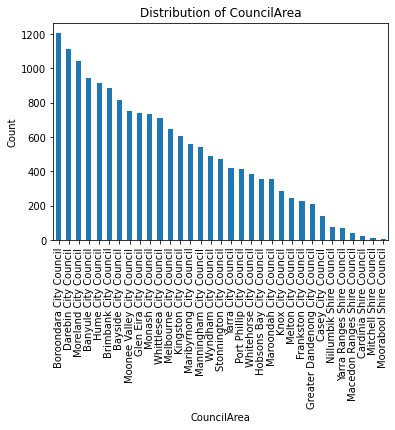

In [35]:
#Visualizing the CouncilArea Data
data["CouncilArea"].value_counts().plot(kind="bar")
plt.title("Distribution of CouncilArea")
plt.xlabel("CouncilArea")
plt.ylabel("Count")
plt.show()

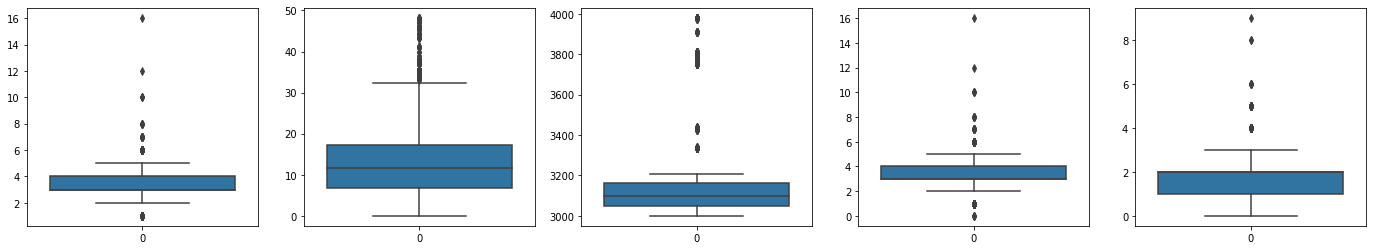

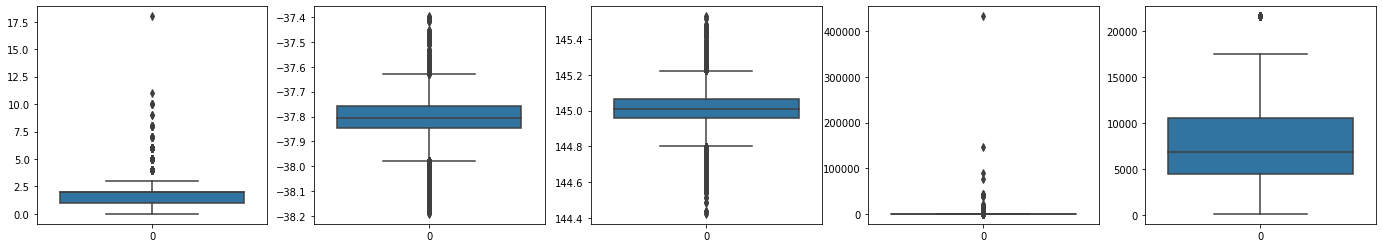

In [37]:
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(data['Rooms'])
plt.subplot(1,5,2)
sns.boxplot(data['Distance'])
plt.subplot(1,5,3)
sns.boxplot(data['Postcode'])
plt.subplot(1,5,4)
sns.boxplot(data['Bedroom2'])
plt.subplot(1,5,5)
sns.boxplot(data['Bathroom'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(data['Car'])
plt.subplot(1,5,2)
sns.boxplot(data['Lattitude'])
plt.subplot(1,5,3)
sns.boxplot(data['Longtitude'])
plt.subplot(1,5,4)
sns.boxplot(data['Landsize'])
plt.subplot(1,5,5)
sns.boxplot(data['Propertycount'])
plt.show()

In [38]:
data = data.drop(['Address','SellerG'],axis=1)

In [39]:
data_num=data[['Rooms','Price','Postcode','Propertycount','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude']]
data_num.head()

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,3,1350000.0,3067,4019,3.0,3.0,2.0,2.0,521.0,-37.80760,145.00780
1,3,858000.0,3042,3464,10.4,3.0,2.0,2.0,521.0,-37.80760,145.00780
2,2,593000.0,3042,3464,10.4,3.0,2.0,2.0,521.0,-37.80760,145.00780
3,3,640000.0,3042,3464,10.4,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,3,961000.0,3042,3464,10.4,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [40]:
data_num.shape

(16454, 11)

In [41]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,0.133333,0.111652,0.068507,0.182501,0.062370,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
1,0.133333,0.067280,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
2,0.066667,0.043380,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
3,0.133333,0.047619,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.000506,0.597858,0.415179
4,0.133333,0.076569,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.001656,0.590048,0.413792
...,...,...,...,...,...,...,...,...,...,...,...
16449,0.133333,0.046492,0.177914,0.543562,0.471933,0.1875,0.111111,0.333333,0.001314,0.279361,0.687917
16450,0.133333,0.032738,0.074642,1.000000,0.249480,0.1875,0.111111,0.055556,0.001203,0.621652,0.543762
16451,0.200000,0.043200,0.065440,0.266611,0.428274,0.2500,0.222222,0.111111,0.001203,0.698661,0.458905
16452,0.133333,0.060290,0.175869,0.184124,0.461538,0.1875,0.222222,0.055556,0.001256,0.268625,0.656962


In [42]:
data_cat =data[['Type','Method','Regionname','CouncilArea','Suburb']]
data_cat.shape

(16454, 5)

In [43]:
# dummification for categorical variables
g_dum=pd.get_dummies(data_cat)

In [44]:
g_dum

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,...,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16449,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16450,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16451,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16452,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_num.head()

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,0.133333,0.111652,0.068507,0.182501,0.062370,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
1,0.133333,0.067280,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
2,0.066667,0.043380,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
3,0.133333,0.047619,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.000506,0.597858,0.415179
4,0.133333,0.076569,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.001656,0.590048,0.413792


In [46]:
# concating the numerical column and updated categorical column 
data_final=pd.concat([g_dum,data_num],axis=1)
data_final.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,...,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,1,0,0,0,1,0,0,0,0,0,...,0.111652,0.068507,0.182501,0.062370,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
1,1,0,0,0,0,0,1,0,0,0,...,0.067280,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
2,0,0,1,0,1,0,0,0,0,0,...,0.043380,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
3,1,0,0,0,1,0,0,0,0,0,...,0.047619,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.000506,0.597858,0.415179
4,1,0,0,0,1,0,0,0,0,0,...,0.076569,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.001656,0.590048,0.413792


In [47]:
data_final.shape

(16454, 404)

In [48]:
data_final['Price']

0        0.111652
1        0.067280
2        0.043380
3        0.047619
4        0.076569
           ...   
16449    0.046492
16450    0.032738
16451    0.043200
16452    0.060290
16453    0.061237
Name: Price, Length: 16454, dtype: float64

Lasso_Regression model building without using sklearn

In [49]:
import numpy as np
import pandas as pd

class LassoRegression:

    # initiating the hyperparameters
    def __init__(self, lambda_parameter, no_of_iterations, learning_rate):
        self.lambda_parameter = lambda_parameter
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
    
    # fitting the dataset to the Lasso Regression model
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = np.mean(y)

        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            coef_w = np.copy(self.w)
            for j in range(X.shape[1]): #This line begins a nested for loop that will iterate over each feature in the feature matrix X. 
                X_j = X[:,j]
                X_not_j = np.delete(X, j, axis=1)

                # linear equation of the model
                y_pred = self.b + X_not_j.dot(self.w[np.arange(X.shape[1]) != j])

                residual_j = X_j.dot(y - y_pred)

                if residual_j < -self.lambda_parameter/2:
                    self.w[j] = (residual_j + self.lambda_parameter/2) / np.sum(X_j**2)
                elif residual_j > self.lambda_parameter/2:
                    self.w[j] = (residual_j - self.lambda_parameter/2) / np.sum(X_j**2)
                else:
                    self.w[j] = 0
                    
            if np.linalg.norm(self.w - coef_w) < self.learning_rate:
                break

    # Predicting the Target variable
    def predict(self, X):
        return self.b + X.dot(self.w)

    # R-squared coefficient to evaluate the model
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y - y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        return 1 - (SS_res / SS_tot)

    # Cross Validation score for K-fold cross validation
    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]      #This line gets the number of rows (samples) in the feature array X
        idx = np.arange(n)  # This line creates an array of integers from 0 to n-1.
        np.random.shuffle(idx)
        X_folds = np.array_split(X[idx], k)  
        y_folds = np.array_split(y[idx], k)
        scores = []  #this line initializes an empty list scores to store the R-squared scores.
        for i in range(k):
            X_train = np.vstack(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            #This line concatenates all the y sub-arrays except the i-th sub-array to create the training target array y_train.
            X_valid = X_folds[i]
            y_valid = y_folds[i] #This line selects the i-th sub-array of y as the validation target array y_valid.
            self.fit(X_train, y_train)
            score = self.r_squared(X_valid, y_valid)
            scores.append(score)
            #This line adds the R-squared score to the scores list.
        return scores

# Grid search to tune the hyperparameters
    def grid_search(self, X, y, param_grid, k=5):
        best_score = -np.inf
        best_params = None
        for params in param_grid:
            self.lambda_parameter = params['lambda']
            self.no_of_iterations = params['iterations']
            self.learning_rate = params['learning_rate']
            scores = self.cross_val_score(X, y, k=k)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.lambda_parameter = best_params['lambda']
        self.no_of_iterations = best_params['iterations']
        self.learning_rate = best_params['learning_rate']

    # Get coefficients of the model
    def get_coefficients(self):
        return self.w, self.b


In [50]:
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.001)

# Split the data into features and target variable
X = data_final.drop('Price', axis=1)
y = data_final['Price']
  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [53]:
# Define the hyperparameters to search over
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
for params in param_grid:
    lambda_parameter = params[0]
    no_of_iterations = params[1]
    learning_rate = params[2]
             
# Create a Lasso Regression object
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.01)

# Print the best hyperparameters and the corresponding cross-validation score
print('Best hyperparameters:', model.lambda_parameter, model.no_of_iterations, model.learning_rate)
#print('Cross-validation score:', np.mean(model.cross_val_score(X_train.values, y_train.values, k=5)))


Best hyperparameters: 0.1 1000 0.01


In [ ]:

#cv_scores = LassoRegression.cross_val_score(X, y, k=5)
cv_scores = model.cross_val_score(X_train.values, y_train.values, k=5)


print("Cross Validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

# Fit the model on the entire dataset
#LassoRegression.fit(X, y)
model.fit(X_train.values, y_train.values)


# Make predictions on new data

X_new = pd.DataFrame([[0]*32])
X_new.iloc[0, :7] = [0.01, 0.001, 0.0001, 0.1, 1, 10, 100]
y_new = model.predict(X_new)
print("Prediction:", y_new)



Cross Validation scores: [0.7363740591208539, 0.7131062570399498, 0.7032945804398949, 0.6889481844533886, 0.7171930231570081]
Average CV score: 0.711783220842219
Prediction: 0    7.468522
dtype: float64


In [ ]:
# Make predictions on the train set
y_train_pred = model.predict(X_train.values)

# Calculate mean squared error
mse_train = ((y_train.values - y_train_pred) ** 2).mean()

# Calculate root mean squared error
rmse_train = np.sqrt(mse_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate R-squared
ssr_train = ((y_train_pred - y_train.values) ** 2).sum()
sst_train = ((y_train.values - y_train.values.mean()) ** 2).sum()
r_squared_train = 1 - (ssr_train / sst_train)

# Print the error metrics
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r_squared_train)


Mean Absolute Error: 0.014577025660103937
Mean Squared Error: 0.0006425322998543955
Root Mean Squared Error: 0.025348220841991956
R-squared: 0.7990015322369317


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test.values)

# Calculate mean squared error
mse_test = ((y_test.values - y_pred) ** 2).mean()

# Calculate root mean squared error
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_pred).mean()

# Calculate R-squared
ssr_test = ((y_pred - y_test.values) ** 2).sum()
sst_test = ((y_test.values - y_test.values.mean()) ** 2).sum()
r_squared_test = 1 - (ssr_test / sst_test)

# Print the error metrics

print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r_squared_test)


Mean Absolute Error: 0.015257156285722473
Mean Squared Error: 0.0007515530201833898
Root Mean Squared Error: 0.027414467351808785
R-squared: 0.7701680154226478
